In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
sampleNo = 5;

In [53]:
s0 = np.array([[-2.25848649,  3.35251005],
 [-2.99297047,  0.33290089],
 [-1.43818701,  1.69365499],
 [-3.05914958, -0.3380505 ],
 [-2.12484234,  2.14868541],
 [-0.21047972,  2.30394458],
 [-3.60356125,  6.22808921],
 [-0.5165278 ,  1.90740988],
 [-1.54887737,  1.63762592]])

s1 =np.array([[ 2.41281153, -1.02083945],
 [ 3.87626612, -4.10840219],
 [ 3.1748448,   1.05400623],
 [ 2.27211665, -7.10902038],
 [ 4.30090963,  0.66675487],
 [ 2.64311209,  4.82250906],
 [ 1.19556516, -6.17784991],
 [ 4.20209102, -1.14324642],
 [ 1.54714445, -2.68912864]])

In [54]:
from pandas import DataFrame
if s0.shape[1] == 2:
    s0 = np.insert(s0, 2, values=1, axis=1) # Add a column of tag values
if s1.shape[1] == 2:
    s1 = np.insert(s1, 2, values=0, axis=1) # Add a column of tag values
s = np.concatenate((s0,s1),axis=0) # concatenate the two groups
df = DataFrame(s, columns=['x1','x2','y'])
df

,x1,x2,y
0,-2.258486,3.352510,1.0
1,-2.992970,0.332901,1.0
2,-1.438187,1.693655,1.0
3,-3.059150,-0.338050,1.0
4,-2.124842,2.148685,1.0
5,-0.210480,2.303945,1.0
6,-3.603561,6.228089,1.0
7,-0.516528,1.907410,1.0
8,-1.548877,1.637626,1.0
9,2.412812,-1.020839,0.0


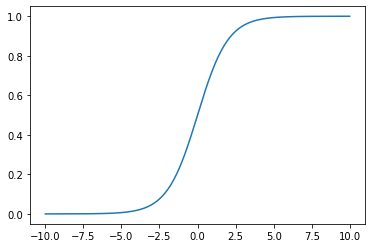

In [55]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
x = np.arange(-10,10,0.01) 
plt.plot(x,sigmoid(x)) 
plt.show()

In [56]:
w1 = -2
w2 = 1
b = 0
loss = 100000
epoch = 0
c = 0.001
while True:
    if(epoch%20==0):
        print("epoch:", epoch)
        print("w1:%.2f, w2:%.2f"%(w1,w2))
    lastloss = loss
    loss = 0
    partialw1 = 0
    partialw2 = 0
    for k in range(2*sampleNo):
        yhat = sigmoid(w1*s[k,0]+w2*s[k,1]+b)
        y = s[k,2]
        loss += (yhat-y)*(yhat-y)
        partialw1 += 2*(yhat-y)*yhat*(1-yhat)*s[k,0]
        partialw2 += 2*(yhat-y)*yhat*(1-yhat)*s[k,1]
    if(epoch%100==0):
        print("loss:", loss)
    if(lastloss<loss):
        break
    w1 = w1 - 0.1 * partialw1
    w2 = w2 - 0.1 * partialw2
    epoch = epoch+1
    if(epoch>1000):
        break
    if(loss<0.1):
        break
    if(lastloss - loss < c):
        break
print("epoch:", epoch)
print("w1:%.2f, w2:%.2f"%(w1,w2))
print("loss:", loss)

epoch: 0
w1:-2.00, w2:1.00
loss: 0.006508373476459802
epoch: 1
w1:-2.00, w2:1.00
loss: 0.006508373476459802


Given a small value we can fix an early stop condition saying that the difference between the lastloss and loss is smaller than that value.

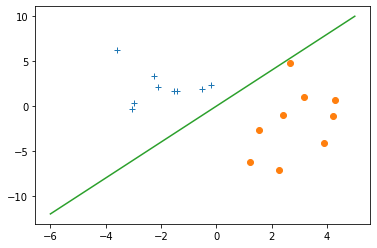

In [57]:
x1 = np.arange(-6,6)
x2 = (-w1 * x1 - b)/w2

plt.plot(s0[:,0],s0[:,1],'+')
plt.plot(s1[:,0],s1[:,1],'o')
plt.plot(x1,x2)

plt.show()